# Pymaceuticals Inc.
---

## Background
You've just joined Pymaceuticals, Inc., a new pharmaceutical company that specializes in anti-cancer medications. Recently, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As a senior data analyst at the company, you've been given access to the complete data from their most recent animal study. In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

The executive team has tasked you with _generating all of the tables and figures_ needed for the technical report of the clinical study. They have _also asked you for a top-level summary of the study results_.

## Prepare the Data
 - [&#x2713;] Run the provided package dependency and data imports.

 - [&#x2713;] Merge the mouse_metadata and study_results DataFrames into a single DataFrame.

 - [&#x2713;] Display the number of unique mice IDs in the data.

 - [&#x2713;] Check for any mouse ID with duplicate time points and display the data associated with that mouse ID.

 - [&#x2713;] Create a new DataFrame where this data is removed. Use this cleaned DataFrame for the remaining steps.
 
 - [&#x2713;] Display the updated number of unique mice IDs.

In [77]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Declare Vairables
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Import the data CSV files into dataframes
df_mouse_metadata = pd.read_csv(mouse_metadata_path)
df_study_results = pd.read_csv(study_results_path)

# Combine the dataframes into a single dataframe
df_mice = pd.merge(df_mouse_metadata, df_study_results, on = "Mouse ID")

# Reordering dataframe columns for human readability
df_mice = df_mice.reindex(columns = ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"])

# Preview dataframe
df_mice


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [78]:
# Checking the number of mice.
int_number_of_mice = df_mice["Mouse ID"].nunique()

# Reveal how many mice were used in the experiment.
print(f"We performed {int_number_of_mice} experiments on mice!")

We performed 249 experiments on mice!


In [79]:
# Display the a list of duplicated 'Mouse ID' and 'Timepoint' rows.
df_duplicate_rows = df_mice[df_mice.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
df_duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [80]:
# Optional: Display each duplicated "Mouse ID" row, including the non-duplicated rows.
df_mice.loc[df_mice["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [81]:
# Remove all rows of the "Mouse ID" which has duplicated values.
df_mice_dropped = df_mice.drop(df_mice[df_mice['Mouse ID'] == 'g989'].index)
df_mice_dropped


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [82]:
# Display the updarted number of mice in the clean DataFrame.
int_new_number_of_mice = df_mice_dropped["Mouse ID"].nunique()
print(f"We now have {int_new_number_of_mice} mice we performed experiments on to analyze!")

We now have 248 mice we performed experiments on to analyze!


## Summary Statistics
 - [&#x2713;] Generate a dataframe with a row for each drug regimen. The regimen names should be contained in the index column.

 - [&#x2713;] Ensure there is a column for the following statistics:
    - mean
    - median
    - variance
    - standard deviation
    - SEM of tumor volume (Standard Error of Mean)

In [83]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Group by "Drug Regimen"
grouped_df_mice_drug_regimen = df_mice_dropped.groupby("Drug Regimen")

# Use summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
series_mean_tumor_volume = grouped_df_mice_drug_regimen["Tumor Volume (mm3)"].mean()
series_median_tumor_volume = grouped_df_mice_drug_regimen["Tumor Volume (mm3)"].median()
series_variance_tumor_volume = grouped_df_mice_drug_regimen["Tumor Volume (mm3)"].var()
series_standard_deviation_tumor_volume = grouped_df_mice_drug_regimen["Tumor Volume (mm3)"].std()
series_standard_error_tumor_volume = grouped_df_mice_drug_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
dict_stats_tumor_volume = {
    "Tumor Volume Mean":series_mean_tumor_volume,
    "Tumor Volume Median":series_median_tumor_volume,
    "Tumor Volume Variance":series_variance_tumor_volume,
    "Tumor Volume Std. Dev.":series_standard_deviation_tumor_volume,
    "Tumor Volume Std. Err.":series_standard_error_tumor_volume 
}

df_Tumor_Volume = pd.DataFrame(dict_stats_tumor_volume)
df_Tumor_Volume


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
'''
Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
Use the aggregation method to produce the same summary statistics in a single line.
'''
# rename the columns to match the desired output
summary_stats = ['mean', 'median', 'var', 'std', 'sem']

# group the dataframe by 'Drug Regimen' and calculate the mean, median, variance, standard deviation, and SEM
df_agg_Tumor_Volume = df_mice_dropped.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': summary_stats})

# display the summary dataframe
df_agg_Tumor_Volume


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

- [&#x2713;] Generate two bar charts. Both charts should be identical and show the total total number of rows (Mouse ID/Timepoints) for each drug regimen throughout the study.

    - [&#x2713;] Create the first bar chart with the Pandas DataFrame.plot() method.

    - [&#x2713;] Create the second bar chart with Matplotlib's pyplot methods.

- [&#x2713;] Generate two pie charts. Both charts should be identical and show the distribution of female versus male mice in the study.

    - [&#x2713;] Create the first pie chart with the Pandas DataFrame.plot() method.

    - [&#x2713;] Create the second pie chart with Matplotlib's pyplot methods.

In [85]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
series_timepoints_per_drug = df_mice_dropped.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)
series_timepoints_per_drug

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Timepoint, dtype: int64

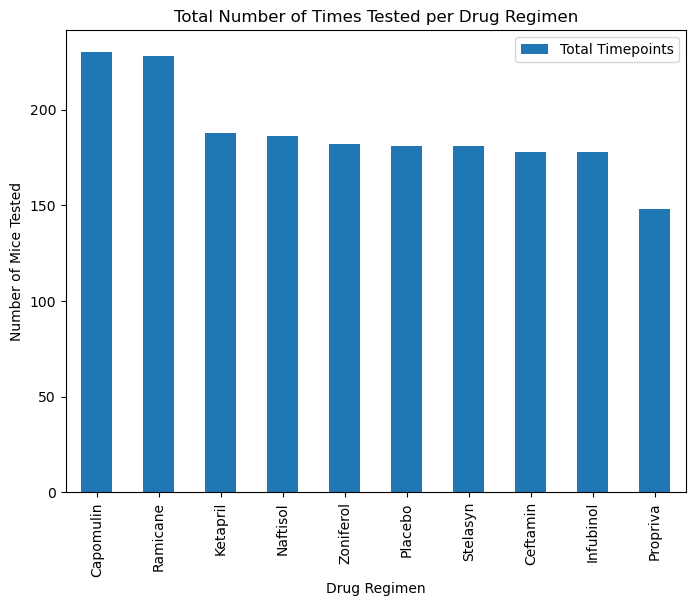

In [86]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
series_timepoints_per_drug = df_mice_dropped.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)

ax = series_timepoints_per_drug.plot(kind="bar", title="Total Number of Times Tested per Drug Regimen", xlabel="Drug Regimen", ylabel="Number of Mice Tested", figsize=(8,6))
ax.legend(["Total Timepoints"])
plt.show()

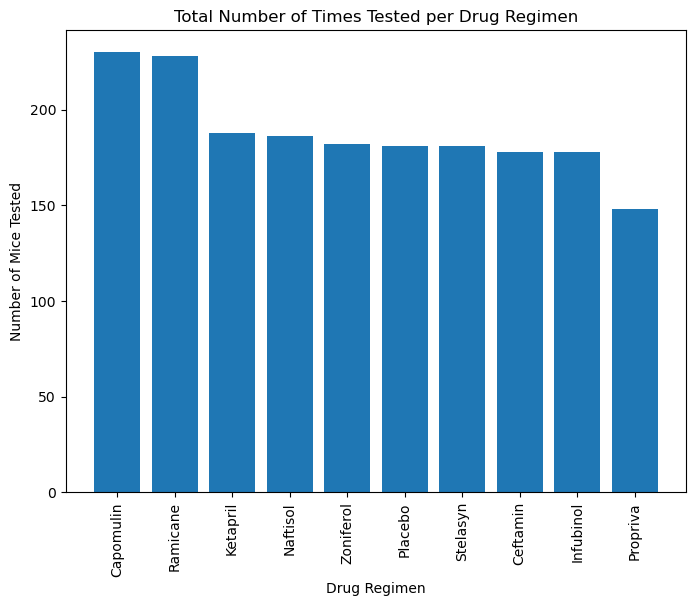

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
series_timepoints_per_drug = df_mice_dropped.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.bar(x=series_timepoints_per_drug.index, height=series_timepoints_per_drug.values)
plt.title("Total Number of Times Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.show()



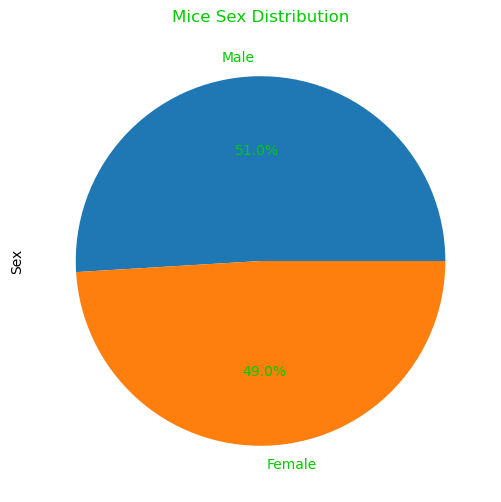

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#create a new figure with a transparent background
plt.figure(facecolor='none', figsize = (6,6))
plot = df_mice_dropped["Sex"].value_counts().plot(kind  = "pie", title = "Mice Sex Distribution", y = "Sex", labels = ["Male", "Female"], autopct = "%1.1f%%", textprops={'color': (0,0.8,0)})
plot.title.set_color((0, 0.8, 0))
plt.show()


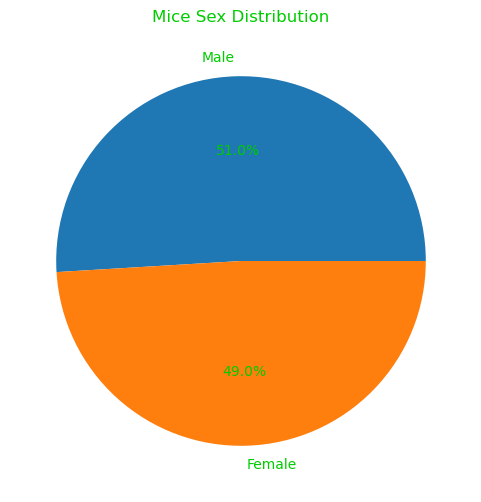

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create a new figure with a transparent background
plt.figure(facecolor='none', figsize = (6,6))
plt.pie(df_mice_dropped["Sex"].value_counts(), labels=["Male","Female"],autopct="%1.1f%%",textprops={'color': (0,0.8,0)})
plt.title("Mice Sex Distribution", color=(0,0.8,0))
plt.show()


## Quartiles, Outliers and Boxplots

- [&#x2713;] Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.

- [&#x2713;] Calculate the quartiles and IQR, and determine if there are any potential outliers across all four treatment regimens.

    - [&#x2713;] Create a grouped DataFrame that shows the last (greatest) time point for each mouse. Merge this grouped DataFrame with the original cleaned DataFrame.

    - [&#x2713;] Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.

    - [&#x2713;] Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment.
    
    - [&#x2713;] Append the resulting final tumor volumes for each drug to the empty list.

    - [&#x2713;] Determine outliers by using the upper and lower bounds, and then print the results.

- [&#x2713;] Using Matplotlib, generate a box plot that shows the distribution of the final tumor volume for all the mice in each treatment group. Highlight any potential outliers in the plot by changing their color and style.

hint: All four box plots should be within the same figure. Use this Matplotlib documentation pageLinks to an external site. for help with changing the style of the outliers.

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
list_selected_regimens = ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo']

# Perform a groupby on the 'Mouse ID' column
df_grouped_Mouse_ID = df_mice_dropped.groupby('Mouse ID')

# Get the index of the row with the maximum 'Timepoint' value for each group (Mouse ID)
series_idx = df_grouped_Mouse_ID['Timepoint'].idxmax()

# Returns a subset of the original dataframe containing only rows with the maximum 'Timepoint' value for each Mouse ID
df_max_timepoint = df_mice_dropped.loc[series_idx.reset_index(drop=True)]

# View the new dataframe
df_max_timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
463,a203,45,67.973419,2,Infubinol,Female,20,23
473,a251,45,65.525743,1,Infubinol,Female,21,25
483,a262,45,70.717621,4,Placebo,Female,17,29
493,a275,45,62.999356,3,Ceftamin,Female,20,28
500,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
1862,z435,10,48.710661,0,Propriva,Female,12,26
84,z578,45,30.638696,0,Ramicane,Male,11,16
1872,z581,45,62.754451,3,Infubinol,Female,24,25
1882,z795,45,65.741070,3,Naftisol,Female,13,29


In [91]:
#Making output more understandable
print("Identifying each drug regimen IQR and outliers.\n")

# Put treatments into a list to be used in a for loop (and later for plot labels)
list_selected_regimens = ['Capomulin','Ramicane', 'Infubinol', 'Placebo']

# Create empty list to fill with tumor vol data (for plotting)
list_tumor_volume = []

# Loop through each drug regimen and get the tumor volumes for that regimen
for iterator_regimen in list_selected_regimens:
    # Filter the dataframe to include only rows with the current regimen
    df_regimen = df_mice_dropped[df_mice_dropped["Drug Regimen"] == iterator_regimen]
    
    # Get the tumor volumes for the current regimen and add them to the list
    list_tumor_volumes_temp = df_regimen["Tumor Volume (mm3)"].tolist()
    list_tumor_volume.append(list_tumor_volumes_temp)
    
    # Calculate the quartiles and IQR for the tumor volumes
    quartiles = df_regimen["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine the lower and upper bounds for potential outliers
    float_lower_bound = lowerq - 1.5*iqr
    float_upper_bound = upperq + 1.5*iqr
    
    # Find the potential outliers within the current regimen
    list_potential_outliers = df_regimen.loc[(df_regimen["Tumor Volume (mm3)"] < float_lower_bound) | (df_regimen["Tumor Volume (mm3)"] > float_upper_bound), "Tumor Volume (mm3)"]

    
    # Print the results for the current regimen
    if len(list_potential_outliers) > 0:
        print(f"{iterator_regimen} has an IQR of {iqr:.2f} with potential outliers of {list_potential_outliers.tolist()}.")
    else:
        print(f"{iterator_regimen} has an IQR of {iqr:.2f} with no outliers.")

Identifying each drug regimen IQR and outliers.

Capomulin has an IQR of 7.31 with potential outliers of [25.47214326, 23.34359787].
Ramicane has an IQR of 8.33 with potential outliers of [22.05012627].
Infubinol has an IQR of 10.00 with no outliers.
Placebo has an IQR of 12.46 with no outliers.


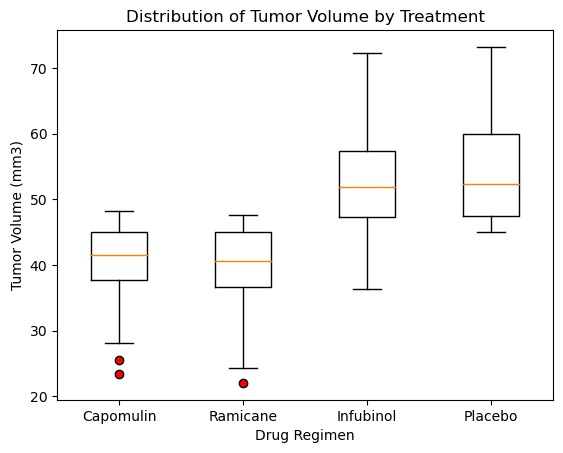

In [92]:
# Generating a box plot that shows the distrubution of the tumor volume for each treatment group

# Put treatments into a list for for loop (and later for plot labels)
list_selected_regimens

# Create empty list to fill with tumor vol data (for plotting)
list_tumor_volume = []

# Loop through each regimen and get the tumor volume data
for regimen in list_selected_regimens:
    # Subset the dataframe by regimen
    subset_df = df_mice_dropped[df_mice_dropped['Drug Regimen'] == regimen]
    
    # Get the tumor volume data
    tumor_vol_data = subset_df['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    list_tumor_volume.append(tumor_vol_data)

# Create a figure and axis object
fig, ax = plt.subplots()

# Create a boxplot using the axis object
ax.boxplot(list_tumor_volume,flierprops={'marker': 'o', 'markerfacecolor': 'red'})

# Set the x-axis label
ax.set_xlabel('Drug Regimen')

# Set the y-axis label
ax.set_ylabel('Tumor Volume (mm3)')

# Set the title
ax.set_title('Distribution of Tumor Volume by Treatment')

# Set the x-axis tick labels to be the distinct regimens
ax.set_xticklabels(list_selected_regimens)

# Show the plot
plt.show()


## Line and Scatter Plots

- [&#x2713;] Select a single mouse that was treated with Capomulin and generate a line plot of tumor volume versus time point for that mouse.

- [&#x2713;] Generate a scatter plot of mouse weight versus average observed tumor volume for the entire Capomulin treatment regimen.

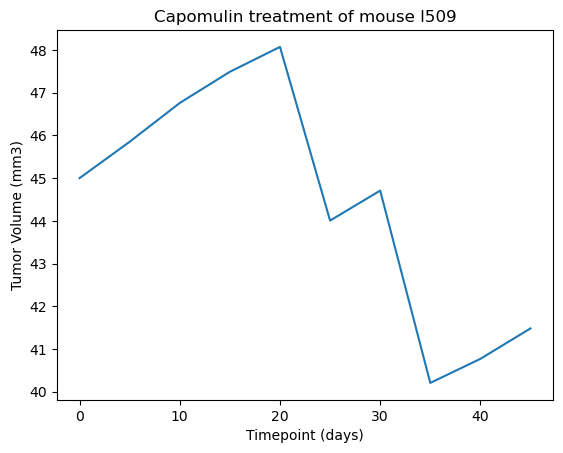

In [93]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Subset the dataframe by regimen
df_capomulin = df_mice_dropped[(df_mice_dropped['Drug Regimen'] == "Capomulin") & (df_mice_dropped['Mouse ID'] == "l509")]

# plot the data as a line plot
plt.plot(df_capomulin["Timepoint"], df_capomulin["Tumor Volume (mm3)"])

# add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

# show the plot
plt.show()



Correlation Coefficient: 0.8419363424694721


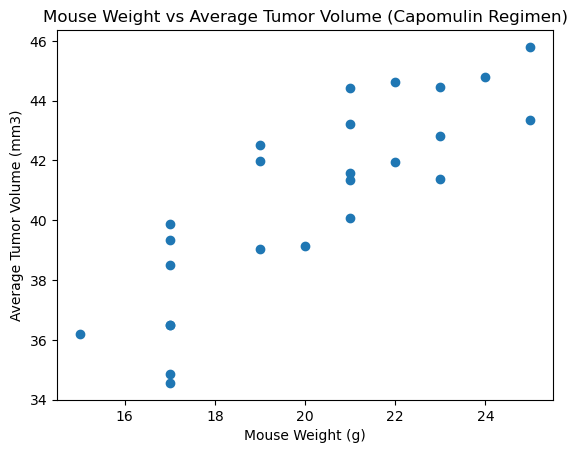

In [94]:
# Filter the DataFrame for Capomulin regimen
capomulin_df = df_mice_dropped[df_mice_dropped['Drug Regimen'] == 'Capomulin']

# Group the DataFrame by mouse ID and calculate average tumor volume and mouse weight
grouped_capomulin = capomulin_df.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Mouse_Weight=('Weight (g)', 'mean')).reset_index()

# Create scatter plot
plt.scatter(grouped_capomulin['Mouse_Weight'], grouped_capomulin['Average_Tumor_Volume'])

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Regimen)')

# Display correlation coefficient
print(f'Correlation Coefficient: {rvalue}')

# Show the plot
plt.show()


## Correlation and Regression
- [&#x2713;] Calculate the correlation coefficient and linear regression model between mouse weight and average observed tumor volume for the entire Capomulin treatment regimen.

- [&#x2713;] Plot the linear regression model on top of the previous scatter plot.

The Correlation Coefficient is: 0.8419363424694721, which indicates a strong positive correlation.


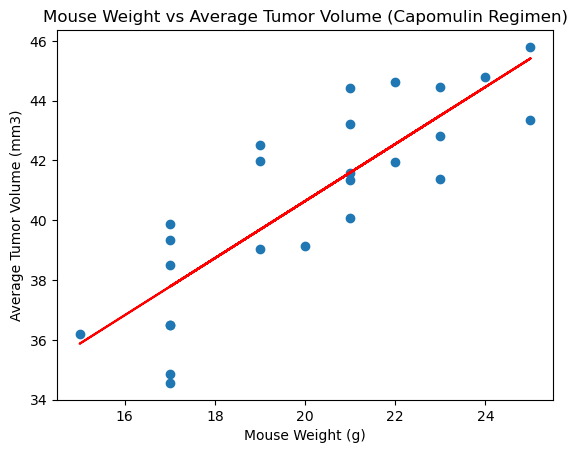

In [95]:
# Filter the DataFrame for Capomulin regimen
capomulin_df = df_mice_dropped[df_mice_dropped['Drug Regimen'] == 'Capomulin']

# Group the DataFrame by mouse ID and calculate average tumor volume and mouse weight
grouped_capomulin = capomulin_df.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Mouse_Weight=('Weight (g)', 'mean')).reset_index()

# Create scatter plot
plt.scatter(grouped_capomulin['Mouse_Weight'], grouped_capomulin['Average_Tumor_Volume'])

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(grouped_capomulin['Mouse_Weight'], grouped_capomulin['Average_Tumor_Volume'])

# Calculate regression line
regress_values = grouped_capomulin['Mouse_Weight'] * slope + intercept

# Plot the regression line
plt.plot(grouped_capomulin['Mouse_Weight'], regress_values, color='red')

# Add labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin Regimen)')

# Display correlation coefficient
print(f'The Correlation Coefficient is: {rvalue}, which indicates a strong positive correlation.')

# Show the plot
plt.show()



# Poor mice but hurrah for scientific progress and the potentially promising study results!